# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis 
The attached _logins.json_ file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [2]:
dataset=pd.read_json("logins.json")

In [3]:
dataset.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
dataset.isna().sum()

login_time    0
dtype: int64

In [5]:
dataset.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
dataset.set_index('login_time', inplace=True)
dataset['count'] = 1

In [8]:
# Aggregate login counts based on 15-minute time intervals
dataset = dataset.resample('15T', label='right').sum()


In [9]:
dataset.head(3)

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9


In [10]:
dataset.tail(3)

,count
login_time,
1970-04-13 18:30:00,2
1970-04-13 18:45:00,7
1970-04-13 19:00:00,6


In [11]:
dataset['time']=pd.to_datetime(dataset.index)
dataset['month']=dataset.time.dt.month
dataset['week']=dataset.time.dt.week
dataset['day']=dataset.time.dt.day
dataset['weekday']=dataset.time.dt.weekday

In [12]:
dataset.sample(5)

,count,time,month,week,day,weekday
login_time,,,,,,
1970-03-22 00:15:00,18,1970-03-22 00:15:00,3,12,22,6
1970-01-14 03:15:00,5,1970-01-14 03:15:00,1,3,14,2
1970-03-25 13:00:00,7,1970-03-25 13:00:00,3,13,25,2
1970-03-25 14:45:00,9,1970-03-25 14:45:00,3,13,25,2
1970-03-12 19:00:00,9,1970-03-12 19:00:00,3,11,12,3


## Login activities by month

In [13]:
print(dataset.groupby('month')['count'].sum())

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April')]

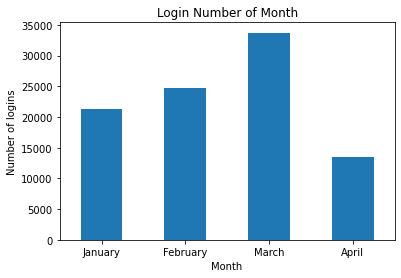

In [14]:

x=dataset.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
x.set_xticklabels([calendar.month_name[d] for d in range(1,5)])

#### we can see the number of logins are more in the month of march and we can't say anything about april because there are only 13 days available in that month

## Login activities by weekday basis

In [15]:
print(dataset.groupby('weekday')['count'].sum())

weekday
0     8849
1     9226
2    10282
3    11951
4    15152
5    19434
6    18248
Name: count, dtype: int64


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

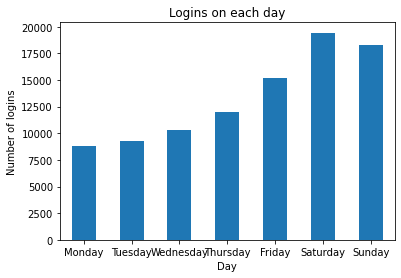

In [16]:

x=dataset.groupby('weekday')['count'].sum().plot(kind='bar')
plt.title("Logins on each day")
plt.xlabel("Day")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
x.set_xticklabels([calendar.day_name[d] for d in range(7)])

#### we can see the number of people loggined are high on weekends as it is free time

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#####  Here Gotham is most active at night and metropolis is most active during the day So to when we reimbursing the toll costs the driver will be available in both the cities based on activeness and Ultimate can meet the demand . We should see the whether we are able to meet the demand so it can be choosen as metric for success

#### we can conduct A/B testing to see before the experiment and after the experiment and if we are meeting demand higher than the previous condition then we can propose some recommendations like increasing the number of drivers to meet the extra demand

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


## Data description 
● **city**:   city this user signed up in   
● **phone**:   primary device for this user   
● **signup_date**:   date of account registration; in the form ‘YYYY MM DD’   
● **last_trip_date**:   the last time this user completed a trip; in the form ‘YYYY MM DD’   
● **avg_dist**:   the average distance in miles per trip taken in the first 30 days after signup   
● **avg_rating_by_driver**:   the rider’s average rating over all of their trips   
● **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips   
● **surge_pct**:   the percent of trips taken with surge multiplier > 1   
● **avg_surge**: the average surge multiplier over all of this user’s trips   
● **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up    
● **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise   
● **weekday_pct**:   the percent of the user’s trips occurring during a weekday 

In [17]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [19]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
dtype: bool

In [20]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [21]:
df.avg_rating_of_driver=df['avg_rating_of_driver'].fillna(np.mean(df.avg_rating_of_driver))
df.avg_rating_by_driver=df['avg_rating_by_driver'].fillna(np.mean(df.avg_rating_by_driver))

In [22]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [23]:
df.phone=df.phone.fillna("iPhone")
df.phone.value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [24]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
dtype: bool

In [25]:
df.signup_date=pd.to_datetime(df['signup_date'])
df.last_trip_date =pd.to_datetime(df['last_trip_date'])

In [26]:
df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
max(df['last_trip_date'])


Timestamp('2014-07-01 00:00:00')

In [28]:
min(df['last_trip_date'])


Timestamp('2014-01-01 00:00:00')

In [29]:
date=pd.to_datetime('2014-06-01')

In [30]:
df['retention'] = df.apply(lambda row: 1 if row.last_trip_date > date else 0, axis=1)

In [31]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [32]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.214728
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.010082
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.003567
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.010612
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.210259
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.026413
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.090279
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.025595
retention,0.214728,-0.010082,-0.003567,0.010612,0.210259,0.026413,-0.090279,-0.025595,1.000000


In [33]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [34]:

df=df.drop(['signup_date','last_trip_date'],axis=1)
df=pd.get_dummies(df,columns=['phone','ultimate_black_user','city'],drop_first=True)

In [35]:
X=df.drop('retention',axis=1)
y=df['retention']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred=regr.predict(X_test)

In [46]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred, average='weighted')

In [47]:
f1

0.704893256456577

In [55]:
imp=regr.feature_importances_

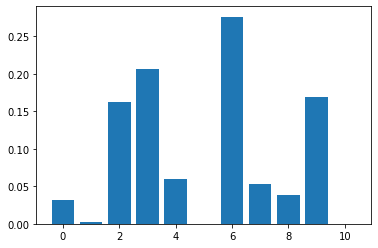

In [56]:
plt.bar([x for x in range(len(imp))],regr.feature_importances_)
plt.show()

In [67]:
fi = pd.DataFrame(list(zip(X.columns, regr.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
3,avg_rating_by_driver,0.312885
1,surge_pct,0.205602
0,avg_surge,0.163162
6,city_King's Landing,0.141116
2,weekday_pct,0.093162
